In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
df = pd.read_csv("C:\LCIT\SEMESTER_1\AISC1006_SP\Fraud.csv")

In [3]:
#Shape of dataset
df.shape

(6362620, 11)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
#missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
#data types
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
#Summary Statistics
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


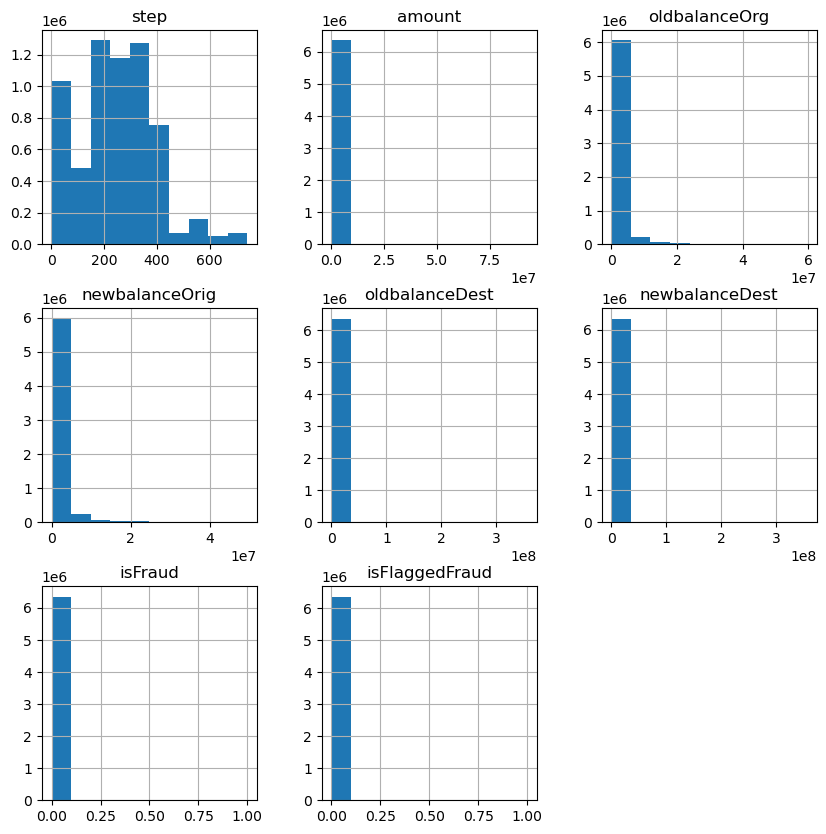

In [8]:
#Histrograms
df.hist(figsize=(10, 10))
plt.show()

In [9]:
#Checking noise in dependent parameters
dataUnq=[df.isFraud.unique(), df.isFlaggedFraud.unique()]
dataUnq

[array([0, 1], dtype=int64), array([0, 1], dtype=int64)]

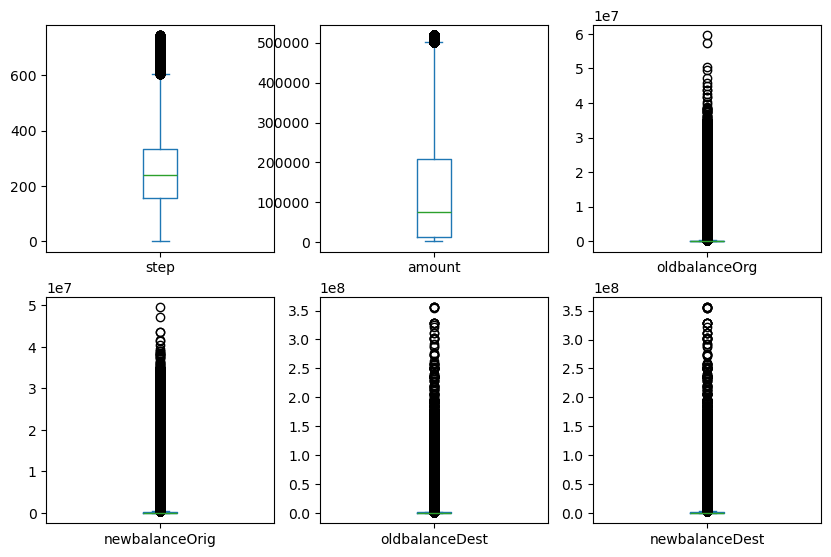

0            9839.64
1            2224.10
2            2224.10
3            2224.10
4           11668.14
             ...    
6362615    339682.13
6362616    518634.19
6362617    518634.19
6362618    518634.19
6362619    518634.19
Name: amount, Length: 6362620, dtype: float64

In [50]:
#Box Plots to find outliers
dataNum=df[['step','amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest']]
dataNum.plot(kind='box', subplots=True, layout =(3,3), sharex=False, sharey=False, figsize=(10,10))
plt.show()

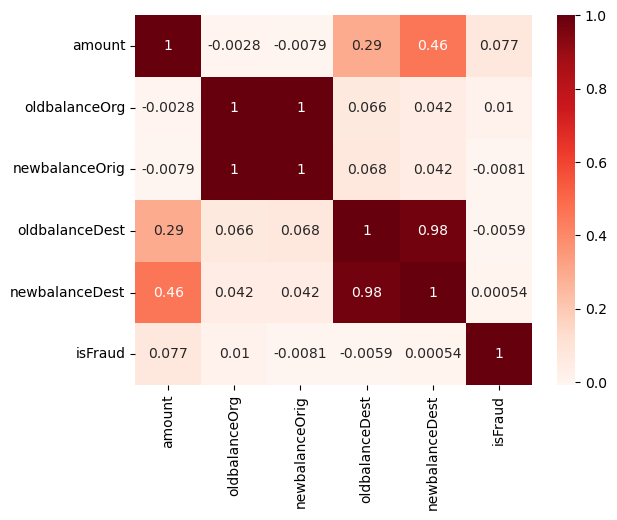

In [11]:
#Coorelation matrix
corr_matrix = df[['amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.show()

In [77]:
#Data Splitting 60,20,20
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(columns=['isFraud'])  # Assuming 'isFraud' is the target
y = df['isFraud']

# First split: 60% training and 40% temporary
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Second split: 50% validation and 50% test from the temporary set (results in 20% each of original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Training set shape: (3817572, 8)
Validation set shape: (1272524, 8)
Test set shape: (1272524, 8)


In [30]:
#Data Preprocessing

In [ ]:
#no missing values in data
#outliers in data 
#numeric features [step, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest]
#Categorial features[type, nameOrig, nameDest, isFlaggedFraud]

In [83]:
#Using Winsorization method to handle outliers in numeric features
#It Cap the extreme values by replacing them with the nearest non-outlier value.

from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OneHotEncoder

# Define the numeric and categorical features
numeric_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
categorical_features = ['type', 'isFlaggedFraud']

# Function to preprocess data
def preprocess_data(X, numeric_features, categorical_features):
    # Apply Winsorization to each numeric feature
    for feature in numeric_features:
        X[feature] = winsorize(X[feature], limits=[0.10, 0.10])
    
    # Apply One-Hot Encoding to the remaining categorical features
    X = pd.get_dummies(X, columns=categorical_features)
    
    return X

# Apply preprocessing to each set
X_train_preprocessed = preprocess_data(X_train.copy(), numeric_features, categorical_features)
X_val_preprocessed = preprocess_data(X_val.copy(), numeric_features, categorical_features)
X_test_preprocessed = preprocess_data(X_test.copy(), numeric_features, categorical_features)

print("Training set shape after preprocessing:", X_train_preprocessed.shape)
print("Validation set shape after preprocessing:", X_val_preprocessed.shape)
print("Test set shape after preprocessing:", X_test_preprocessed.shape)

Training set shape after preprocessing: (3817572, 13)
Validation set shape after preprocessing: (1272524, 13)
Test set shape after preprocessing: (1272524, 13)


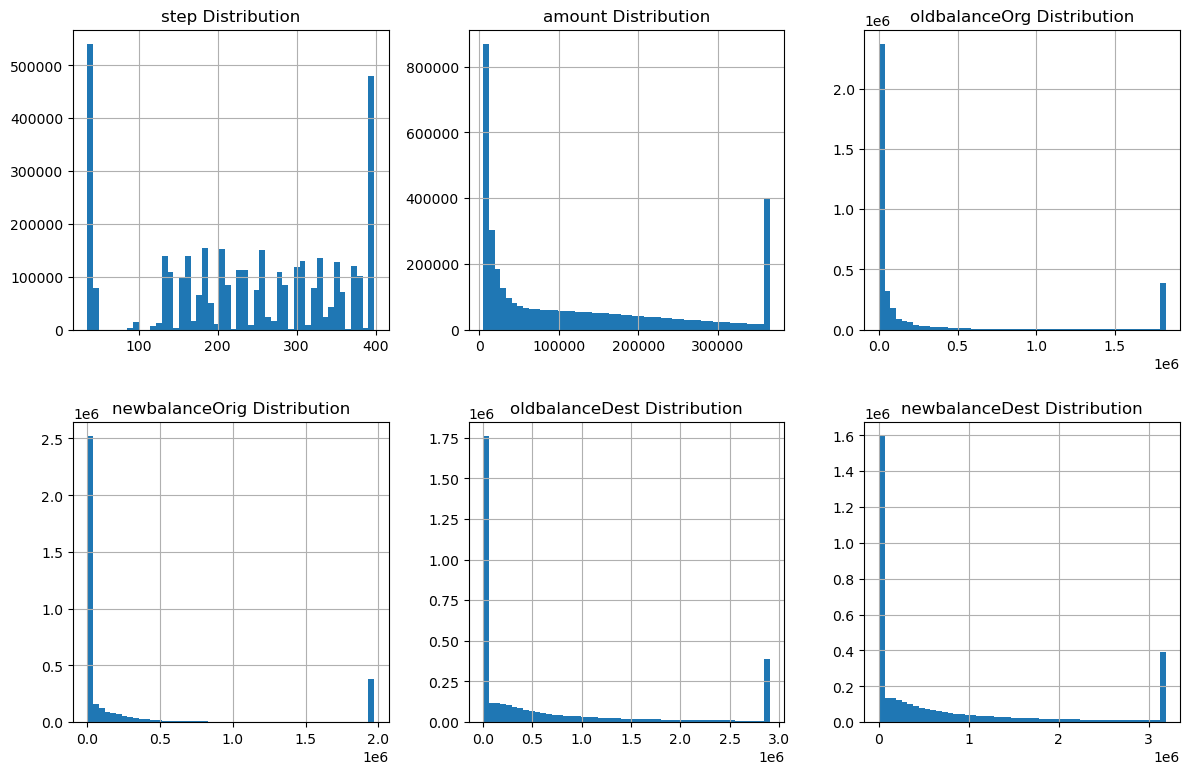

In [85]:
## Visualizing Numerical features with bar plots after applying Winsorization

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i + 1)
    X_train_preprocessed[feature].hist(bins=50)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

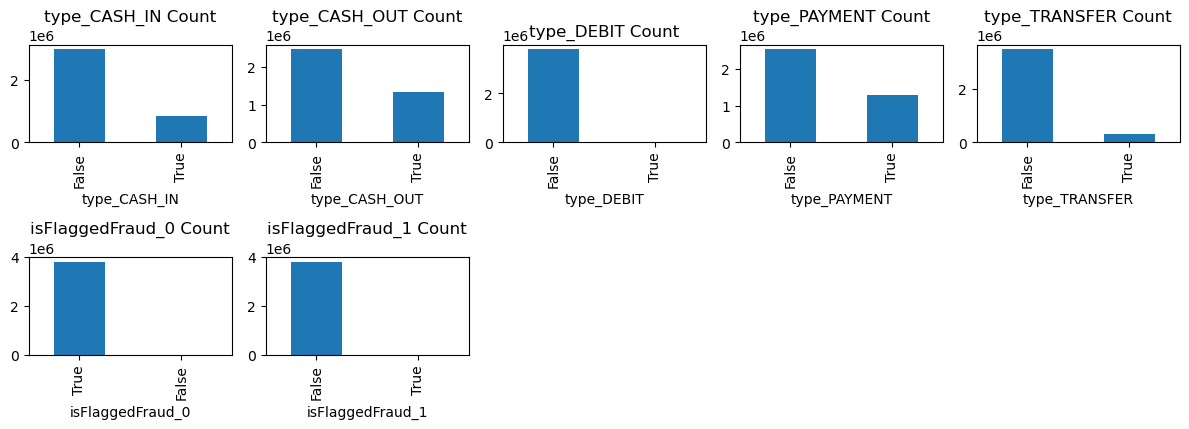

In [87]:
# Visualizing Categorial features with bar plots after OneHot Encoding

one_hot_features = [col for col in X_train_preprocessed.columns if col.startswith(tuple(categorical_features))]
plt.figure(figsize=(12, 8))
for i, feature in enumerate(one_hot_features):
    plt.subplot(4, 5, i + 1)
    X_train_preprocessed[feature].value_counts().plot(kind='bar')
    plt.title(f'{feature} Count')
plt.tight_layout()
plt.show()

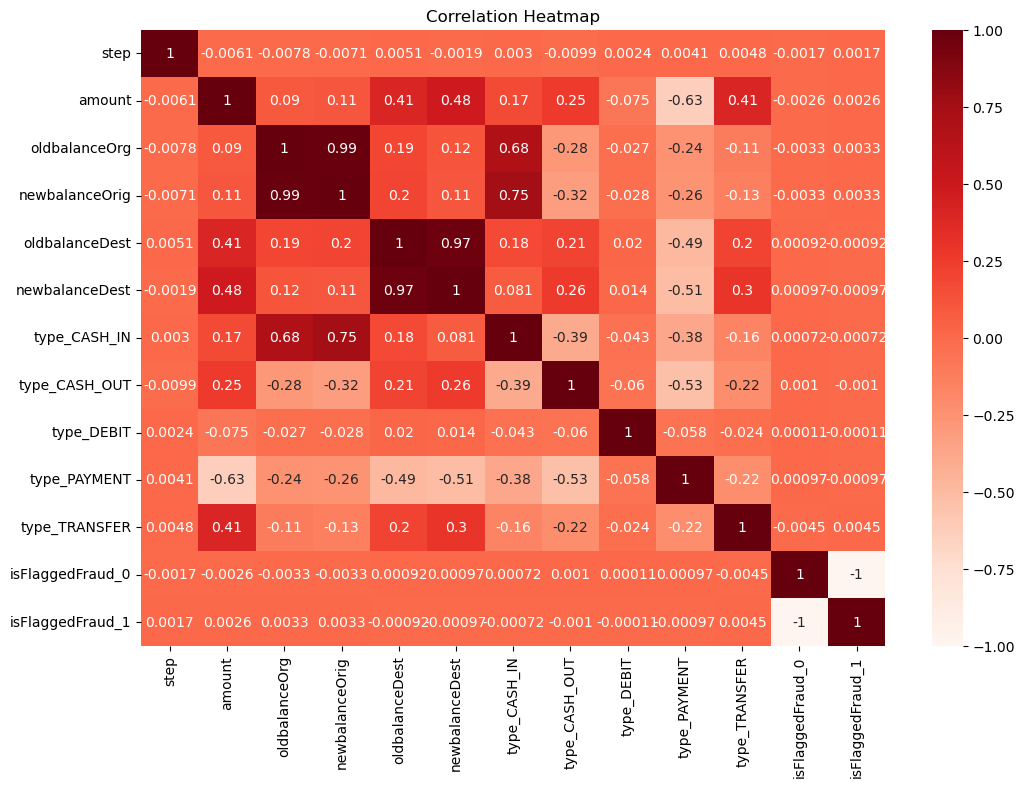

In [104]:
# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
corr = X_train_preprocessed.corr()
sns.heatmap(corr, annot=True, cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()

In [112]:
X_train_preprocessed.head(10)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFlaggedFraud_0,isFlaggedFraud_1
950383,44,28970.24,5043.00,0.00,0.00,28970.24,False,True,False,False,False,True,False
4726448,332,113276.32,766.00,0.00,1395944.95,1509221.27,False,True,False,False,False,True,False
812365,40,7111.48,0.00,0.00,0.00,0.00,False,False,False,True,False,True,False
2674942,210,365367.51,229653.00,0.00,124339.15,504764.29,False,False,False,False,True,True,False
5703950,398,27822.19,451325.69,423503.50,0.00,0.00,False,False,False,True,False,True,False
144379,35,196024.25,651078.14,847102.39,630435.82,434411.57,True,False,False,False,False,True,False
5226608,370,28946.68,1822610.84,1971095.37,52911.51,23964.83,True,False,False,False,False,True,False
2878496,228,223761.95,25251.00,249012.95,0.00,0.00,True,False,False,False,False,True,False
2857698,227,23234.39,0.00,0.00,0.00,0.00,False,False,False,True,False,True,False
6123367,398,40113.84,530931.00,490817.16,0.00,0.00,False,False,False,True,False,True,False
